In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
sheet_url = "https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0"
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
spotify_challenge = pd.read_csv(url)

In [4]:
# seeing some values to get idea of the data
spotify_challenge

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [5]:
# look at the preliminary data
spotify_challenge[['order_amount','total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


## Let's do some calculations to find the Average Order Value (AOV)

In [6]:
# let us first see the value of sneakers order_amount
total_order = spotify_challenge['order_amount']
total_item = spotify_challenge['total_items']

In [7]:
average_order_value = total_order / total_item
average_order_value_mean = round(np.mean(average_order_value), 2)
print(f'The per sneaker value is ${average_order_value_mean}.')

The per sneaker value is $387.74.


It can be seen that the cost of per sneakers is 387.74. It was seen that the mean of Average Order Value (AOV) is $3145.128 per order. There is a problem with this data, the data has not been clear of the anomalies. Let us first find all the anomalies.

#### Par 1) Finding the z-score of the order value and working more on order value, then anomaly

In [8]:
# Describing the order value
spotify_challenge['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

We have now seen the mean of the order value and the standard deviation, find the z-score.

In [9]:
order_amount_mean = spotify_challenge['order_amount'].mean()
order_amount_std = spotify_challenge['order_amount'].std()

z_score_data = spotify_challenge.copy()

# Now add a z-score that will contain all the important data
z_score_data['z_score'] = (z_score_data['order_amount'] - order_amount_mean) / order_amount_std

# We can also get rid data that is not udeful to us.
z_score_data = z_score_data[['shop_id', 'order_amount', 'total_items', 'z_score']]

z_score_data.head()

,shop_id,order_amount,total_items,z_score
0,53,224,2,-0.070759
1,92,90,1,-0.074005
2,44,144,1,-0.072697
3,18,156,1,-0.072407
4,18,156,1,-0.072407


In [10]:
z_score_data[z_score_data['z_score'] > 1]

,shop_id,order_amount,total_items,z_score
15,42,704000,2000,16.977029
60,42,704000,2000,16.977029
490,78,51450,2,1.170104
493,78,51450,2,1.170104
511,78,51450,2,1.170104
520,42,704000,2000,16.977029
617,78,51450,2,1.170104
691,78,154350,6,3.662683
1104,42,704000,2000,16.977029
1259,78,77175,3,1.793249


It can now be seen that shop 42 and shop 78 were anomalies. This could have been done earlier but both steps helped in confirming the data finding.

In [11]:
# making a new set with clear data,i.e., removing shop_id == 42 and shop_id == 78
new_data = spotify_challenge[(spotify_challenge['shop_id'] != 42) & (spotify_challenge['shop_id'] != 78)]
new_data_aov = round(np.mean(new_data['order_amount']), 2)
print(f'The Average Order Value for the sneaker shop is ${new_data_aov} after removing shops with anomalies.')

The Average Order Value for the sneaker shop is $300.16 after removing shops with anomalies.


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### Part 2) Find the anomalies from the data using long steps

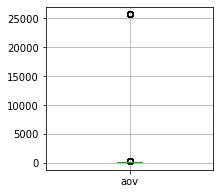

In [12]:
clear_data = spotify_challenge.copy()

# Now add a column average order value (aov) that will contain all the important data
clear_data['aov'] = clear_data['order_amount'] / clear_data['total_items']
ax = clear_data.boxplot(['aov'], figsize=(3,3))

It can be seen that the data has some outliners and now we need to remove them before doing any other calculations.

#### First see the shop_id 
Reason is because shops are selling the sneakers and we need to find the pattern of those shops to look at any anomalies

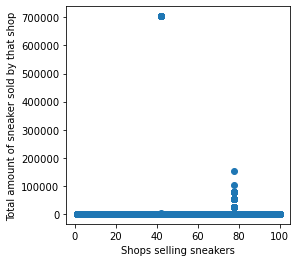

In [13]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(spotify_challenge['shop_id'], spotify_challenge['order_amount'])
ax.set_xlabel('Shops selling sneakers')
ax.set_ylabel('Total amount of sneaker sold by that shop')
plt.show()

In [14]:
average_order_value

0       112.0
1        90.0
2       144.0
3       156.0
4       156.0
        ...  
4995    165.0
4996    117.0
4997    117.0
4998    177.0
4999    144.0
Length: 5000, dtype: float64

In [15]:
average_order_value.sort_values(ascending=False)

4420    25725.0
2906    25725.0
4505    25725.0
493     25725.0
2452    25725.0
         ...   
2714       90.0
3915       90.0
4760       90.0
2128       90.0
1927       90.0
Length: 5000, dtype: float64

It is now confirm that there is a store that has an average order value of $25725 which is a really high value. It is now our jo to find that shop_id and remove that.

Let us first make a new table or a series that will contain the new data that is cleared of all the anomalies

In [16]:
clear_data = spotify_challenge.copy()

# Now add a column average order value (aov) that will contain all the important data
clear_data['aov'] = clear_data['order_amount'] / clear_data['total_items']

# We can also get rid data that is not udeful to us.
clear_data = clear_data[['shop_id', 'order_amount', 'total_items', 'aov']]

clear_data.head()

,shop_id,order_amount,total_items,aov
0,53,224,2,112.0
1,92,90,1,90.0
2,44,144,1,144.0
3,18,156,1,156.0
4,18,156,1,156.0


In [17]:
# Now find the shop_id with anomalies
clear_data.groupby(clear_data['shop_id'])['aov'].mean().reset_index().sort_values(by='aov', ascending=False).head()

,shop_id,aov
77,78,25725.0
41,42,352.0
11,12,201.0
88,89,196.0
98,99,195.0


**Now we have found the shop with the anomaly, i.e., the shop with shop_id = 78**

In [18]:
# Finding th new average order value after removing the anomaly and plotting a graph to see the same
np.mean(clear_data[clear_data['shop_id'] != 78]['aov'])

152.47557529269278

It can now be seen that the average order value per store comes to an approx of $152.47 after removing the shop with anomaly.

**Till now we have worked only with Average Order Value (AOV), now lets look at some other parameter, i.e., order amount and total order**

There are chances that these features will have some anomalies which will help with proper data classification.

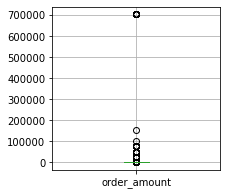

In [19]:
ax = spotify_challenge.boxplot(['order_amount'], figsize=(3,3))

It can be seen that there is a show which has such a high order value. First find that shop.

In [20]:
spotify_challenge.sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


It is now seen that we have the id of the shop selling 2000 items. We need to remove this anomaly because the shop is creating problem with the data. Let us look at the shop_id = 42

In [21]:
spotify_challenge[spotify_challenge['shop_id']==42].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58


It can now be seen that it is customer with user_id = 607 causing the anomaly in the data.

Now, we have two choices, removing user with user_id = 607 or removing shop with shop_id = 42. We will choose removing shop_id = 42 because customer is king. Never doubt a customer and those purchases would have been verifies.

In [22]:
# making a new set with clear data,i.e., removing shop_id == 42 and shop_id == 78
anomaly_clear_data = spotify_challenge[(spotify_challenge['shop_id'] != 42) & (spotify_challenge['shop_id'] != 78)]

In [23]:
anomaly_average_aov = round(np.mean(anomaly_clear_data['order_amount']), 2)
print(f'The Average Order Value for the sneaker shop is ${anomaly_average_aov} after removing shops with anomalies.')

The Average Order Value for the sneaker shop is $300.16 after removing shops with anomalies.


**---------------------------------------------------------------------------------------------End of Coding Part----------------------------------------------------------------------------------------**

###### Answering to the questions asked

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

**Ans.** There are certain problems in our dataset that are are skewing the observation. For example, shop 42 has 17 transactions of 2000 units each for \$704,000 which heavily skews the data. There are several ways to evaluate the data:

<ul>
    <li>Use z-score to find the anomalies in data </li>
    <ul><li>We will implement z-score to see how each transaction differs from the norm. Then, we can filter out anomalies and
            see what went wrong with our analysis.</li>
        <li> Looking at the fact that we need anomaly in our data, then we can use different idea or different method to find Average Order Value (AOV). We can see that third quartile was near the value.</li></ul>  
    <li>Removing anomalies after looking and analysing data</li> 
    <ul><li>We would need to analyse our data to find the values that skew our results. One way of doing so is using box and whisker plot.</li>
        <li>Look at each necessary data column, which is order_amount, total_items here.</li></ul></ul>

**b) What metric would you report for this dataset?**

**Ans.** As it can be seen that if we would just look at the plane data and see the mean or average Average Order Value (AOV), then we would have our mean AOV of \$3145.12 which is far from what it should be. There is a tendency in mean that any abnormal value can skew the result. Then for this problem, the third quartile result or 75% return is better to judge. 

Another method to report this data is looking at the abnormalities with help of z-score. z-score is used here because it is the most common way to find anomalies. The score will help us with many irregular things. 

Finally, if we are given permission to remove large anomalies from the data, then we can find the mean and give the result.

**c) What is its value?**

**Ans.** The value depends on the way we report the data. If we want to report the data as it is form, then we can report the 75% value which is \$390 Average Order Value. 

We removies anomalies is permissible, then the Average Order Value can come out to be $300.16.